In [2]:
### Easiest binary classification algorithm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# visual your data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('Decision_Tree_ Dataset.csv')
dataset.head()

,Initial payment,Last payment,Credit score,House number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


Initial payment    0
Last payment       0
Credit score       0
House number       0
Result             0
dtype: int64

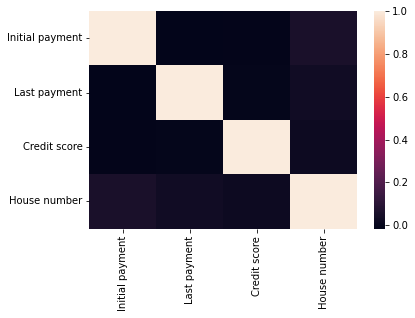

In [4]:
### Heat map
sns.heatmap(dataset.corr())

### This looks how many empty spaces are in the table.
dataset.isnull().sum()

In [ ]:
### If there are empty spaces, run these comands

dataset1=dataset[dataset.columns[2:]]   #adjust the number of columns

for i in dataset1.columns :
    dataset1[i] = dataset1[i].fillna(int(dataset1[i].mean()))
    #print(dataset[i])

dataset1.isnull().sum()

In [8]:
# Select X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Transforming text to an array of number
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
print(X.shape, y.shape)
#print(y)

(1000, 4) (1000,)


In [10]:
X

array([[  201, 10018,   250,  3046],
       [  205, 10016,   395,  3044],
       [  257, 10129,   109,  3251],
       ...,
       [  316, 14872,   613,  4760],
       [  305, 14926,   897,  4572],
       [  168, 14798,   834,  4937]])

In [ ]:
## IF needed  ()
### NORMALIZE the data from -1 to 1

print(len(X))
print(len(X[0]))

max_value= [0] * len(X[0])
min_value= [0] * len(X[0])

for i in range(0,len(X[0])):
    max_value[i] = X[:, i].max()
    min_value[i] = X[:, i].min()
    print(max_value[i])
    print(min_value[i])


for b in range(0,len(X[0])):
    for a in range(0,len(X)):
        X[a, b] = (2*((X[a, b]-min_value[b])/(max_value[b]-min_value[b])))-1

X

In [12]:
### Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)   # predictions

y_pred = model.predict(X_test)
#print(y_pred.shape)
#print(y_test.shape)

In [13]:
print('Accuracy is =', accuracy_score(y_test, y_pred)*100) 
# Confusion matrix
print('\n Confusion matrix is = \n', confusion_matrix(y_test, y_pred))
# Confusion matrix metrics
print('\n Confusion matrix metrix is = \n',classification_report(y_test, y_pred))

Accuracy is = 93.66666666666667

 Confusion matrix is = 
 [[134  13]
 [  6 147]]

 Confusion matrix metrix is = 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       147
           1       0.92      0.96      0.94       153

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

